# Сборный проект 1

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
    
Введение можно улучшить, если в описании проекта мы выделим основные задачи и опишем их своими словами, особенно с позиции бизнес задачи, которая решается. Так же можно добавить краткий план работы, основные этапы, которые мы должны выполнить и  описание данных.

In [1]:
# импорт всех библитотек
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
from scipy import stats as st
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
from statistics import median
import statistics

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Молодец, что загружаешь все библиотеки в начале проекта. Так сложней случайно удалить ячейку с загрузкой нужной библиотеки и сделать код не работающим. А получатель отчета сразу поймет, какие библиотеки ты используешь и какие ему нужно установить для запуска проекта.


## Подготовка данных

In [2]:
pth1 = 'games.csv'
pth2 = '/datasets/games.csv'
    
if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong')
    
display(df.head(7))
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
    
Сразу после получения информации о таблице, будет здорово сформулировать вывод: проверить типы данных, а также важно понять, что по пропущенным значениям.
</div>

### Замените названия столбцов (приведите к нижнему регистру)

In [3]:
df.Rating.value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

### Преобразование типов и замена пропусков

#### Столбец ``Year of release``

Надо бы перевести ``year of release`` в int64, так как это год и он не может быть дробным'
Но в этом столбце есть около 267 пропусков. Это совсем не много относительно 16715 строк, 
можем удалить их для начала.

In [5]:
df = df.dropna(subset=['year_of_release'])
df['year_of_release'] = df.year_of_release.astype('int64')

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
    
В целом, да, процент пропусков небольшой, и мы можем так поступить!
</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>

Будет хорошо отобразить кол-во пропусков по датафрейму. Удобнее смотреть на процент пропусков по колонкам, это можно сделать,  например, так:

`data.isnull().sum()*100/len(data)`

Более продвинутый вариант (кол-во пропусков + процент пропусков)

`report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)`

Это полезное действие при подборе стратегии заполнения пропусков: обычно, если в данных кол-во пропусков превышает 10%, восполнение пропусков результатами выполнения стандартных операций типа расчета среднего/медианы по столбцу, может привести к искажению данных. Если мы сталкиваемся с такой ситуацией, то важно подумать и подобрать более сложную восполнения пропусков в данных.

#### Столбцы  ``critic_score`` & ``user_score``

Пропусков в стошлбцах ``critic_score`` & ``user_score`` слишком много. 
К тому же рейтинги следует привести к float с 1 знаком после запятой.
Чтобы рейтинги были одинаковыми - разделим столбец ``critic_score`` на 10

In [6]:
df['critic_score'] = df['critic_score'] / 10
df['critic_score'][:2]

0    7.6
1    NaN
Name: critic_score, dtype: float64

Надо бы поменять тип столбца 'user_score', но нас поджидает 2376 строк со значением 'tbd'.
Всвязи с этим решаю обработать эти 2376 строк.
Я специально обратился в гугл и узнал что TBD = To Be Determined, то есть "оценка будет определена позже"
То есть рейтинг еще не посчитался.
Так как мы не можем ни удалить, ни восстановить, ни заменить на медиану, заменим это на простые пропуски NaN

In [7]:
df.loc[(df.user_score == 'tbd'), 'user_score'] = 'NaN'

In [4]:
df.columns = df.columns.str.lower()
df.head(0)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


<div class="alert alert-info">
Поменял на пропуски
</div

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 v_2 <a class="tocSkip"> </h2>

Хорошо)

Переведем теперь данный столбец в тип float64

In [8]:
df['user_score'] = df['user_score'].astype('float64')
df['user_score'][:3]

0    8.0
1    NaN
2    8.3
Name: user_score, dtype: float64

Остальные пропуски в этих столбцах пока трогать не будем

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Столбец ``rating``

In [10]:
df.rating.value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Поменяем пропуски в этом столбце на ``undefined``

In [11]:
df.rating = df.rating.fillna('undefined')

<div class="alert alert-info">
Поменял на undefined
</div

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
        
Пропуски в колонке `rating` я бы посоветовала заменить на `undefined`. Это важно потому, что на более поздних этапах анализа (когда будет анализировать рейтинг по регионам) важно включить в анализ игры без рейтинга и сравнить их с теми играми, у которых рейтинг есть. 

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 v_2 <a class="tocSkip"> </h2>

👍

#### Столбец ``name``

In [12]:
# 2 пропуска, глянем ка
df.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,undefined
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,undefined


2 игры 1993 года с минимумом кол-вом даных. Дропнем весело!

In [14]:
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16444 non-null  int64  
 1   name             16444 non-null  object 
 2   platform         16444 non-null  object 
 3   year_of_release  16444 non-null  int64  
 4   genre            16444 non-null  object 
 5   na_sales         16444 non-null  float64
 6   eu_sales         16444 non-null  float64
 7   jp_sales         16444 non-null  float64
 8   other_sales      16444 non-null  float64
 9   critic_score     7983 non-null   float64
 10  user_score       7463 non-null   float64
 11  rating           16444 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB


Супер! Так гораздо лучше) Типы в порядке, пропуски уже лучше.

### Считаем суммарные продажи в регионах

In [15]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']
df.head(2)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,74.09
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,39.47


<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 <a class="tocSkip"> </h2>

Блок предобработки выполнен хорошо: необходимые столбцы добавлены, названия и типы скорректированы, пропуски обработаны, молодец)
</div>

### Проверим на явные дубликаты все строки таблицы

In [16]:
df.duplicated().sum()

0

Также проверим на неявные дубликаты жанры и платформы

In [17]:
col_list = ('genre', 'platform')
for i in col_list:
    print(df[i].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [13]:
df = df.dropna(subset=['name'])
df.query('name.isna()')['name'].sum()

0

<div class="alert alert-info">
Явных и неявныхдубликатов нет.
</div

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 v_2 <a class="tocSkip"> </h2>

Отлично, молодец!)

## Исследовательский анализ

### Анализ игр в разные годы

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [18]:
games_by_year = df.pivot_table(index='year_of_release', values='name', aggfunc = 'count')
games_by_year.columns=(['count'])
games_by_year.head(2)

,count
year_of_release,
1980,9
1981,46


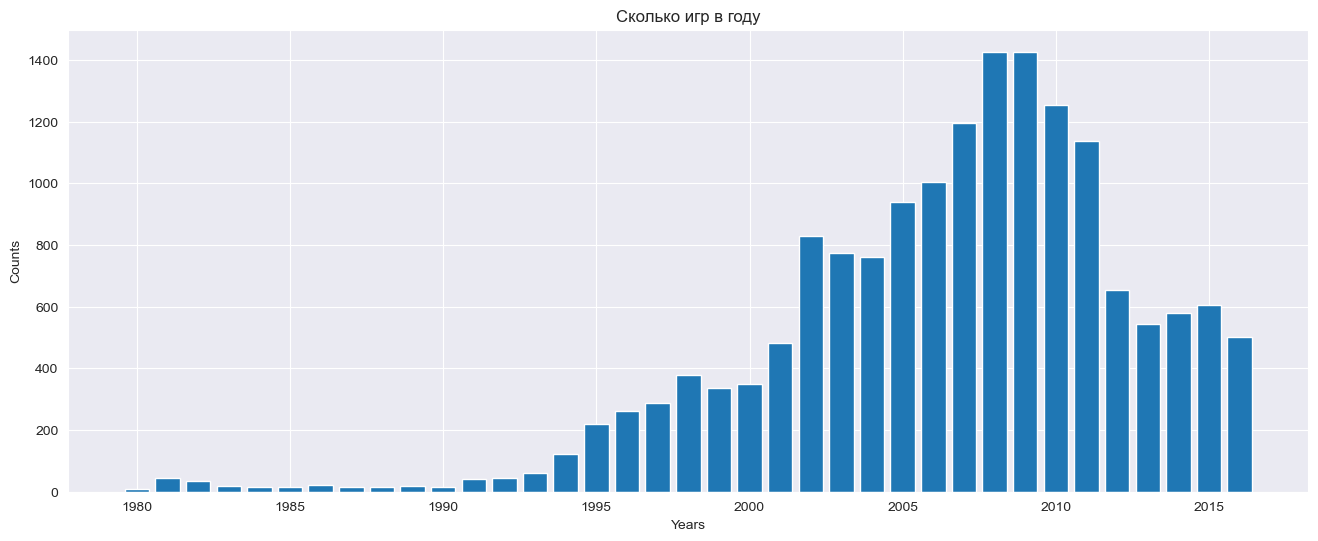

In [19]:
fig, ax = plt.subplots(figsize=(16,6))
x = games_by_year.index
y = games_by_year['count']
ax.bar(x, y,)

ax.set_xlabel('Years')
ax.set_ylabel('Counts')
ax.set_title('Сколько игр в году')

plt.show()

<div class="alert alert-info">
Выводы по графику: Мы видим нормальное распределение, смещенное вправо.
Также видим что расцвет индустрии приходится на 2002 - 2012 год.
Изначально тренд был восходящий, но достигнув пика популярности в 2008 - 2009 году тренд стал низходящим.

Для того, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании нам необходимо взять актуальные данные - за последние 2 года.
</div

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
Подписи осей лучше делать на том же языке, что и названия графиков) Будет здорово его немного увеличить)

<div class="alert alert-info">
Переделал этот блок - он ниже
</div

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 v_2 <a class="tocSkip"> </h2>

Хорошо)

### Как менялись продажи по платформам

#### Анализ всех платформ по годам

Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [20]:
# Сгруппируем данные для анализа
df_platforms = df.groupby(['platform', 'year_of_release']).sum()
df_platforms_total_sum = df_platforms.groupby('platform').agg(total_sums=('total_sales', 'sum'))
# Сразу создали данные для графика 
df_platforms_total_sum = df_platforms_total_sum.sort_values(['total_sums'], ascending=False)
# возьмем топ 15 платформ для анализа
df_platforms_total_sum = df_platforms_total_sum.query('total_sums > 200')
platforms = list(df_platforms_total_sum.index)

In [21]:
df_platforms.query('platform == "PS2"').index[-1][1] - df_platforms.query('platform == "PS2"').index[0][1]

11

index  na_sales  eu_sales  jp_sales  other_sales  \
platform year_of_release                                                       
PS2      2000              559235     16.08     10.64      8.87         3.58   
         2001             1160981     79.49     52.37     17.79        16.78   
         2002             1818389     96.54     65.27     21.85        21.72   
         2003             1436148     83.54     61.20     18.88        20.69   
         2004             1595030     96.78     56.01     19.17        39.85   
         2005             1687554     85.60     40.86     15.05        19.15   
         2006             2465866     49.93     21.61     17.64        14.24   
         2007             2037444     32.05     10.43      9.82        23.69   
         2008             1781176     21.23      7.63      5.73        19.31   
         2009              862772      9.36      4.94      1.94        10.16   
         2010              438643      2.19      1.54      0.71         1.20   
         2011               88038      0.13      0.13      0.09         0.10   

                          critic_score  user_score  total_sales  
platform year_of_release                                         
PS2      2000                    391.0       302.5        35.59  
         2001                   1055.2       978.2       149.65  
         2002                   1454.5      1404.3       183.66  
         2003                   1337.4      1471.0       163.62  
         2004                   1455.4      1608.5       171.96  
         2005                   1341.3      1487.8       141.51  
         2006                    865.1       908.2        89.18  
         2007                    480.7       496.7        52.30  
         2008                    281.6       387.8        34.59  
         2009                     91.2       197.3        16.24  
         2010                      7.7        42.8         4.44  
         2011                      0.0        17.8         0.35

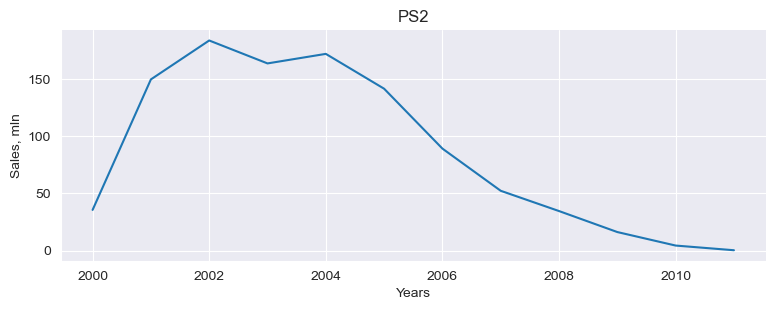

Сумма за все года: 1043.09


index  na_sales  eu_sales  jp_sales  other_sales  \
platform year_of_release                                                       
X360     2005              111104      6.90      0.43      0.28         0.64   
         2006              681789     35.16     10.84      1.20         4.42   
         2007              755530     62.99     22.17      1.52         8.73   
         2008              793188     82.51     38.16      1.89        12.70   
         2009             1156973     74.00     33.31      1.95        11.03   
         2010             1203224    107.38     46.31      2.11        14.23   
         2011             1555887     86.75     42.58      1.78        12.73   
         2012              623668     58.39     32.00      1.06         8.29   
         2013              446878     53.36     27.03      0.43         7.76   
         2014              441867     20.25     11.28      0.08         3.13   
         2015              302020      7.36      3.50      0.00         1.10   
         2016              145137      0.69      0.71      0.00         0.12   

                          critic_score  user_score  total_sales  
platform year_of_release                                         
X360     2005                    122.7       117.7         7.61  
         2006                    530.8       530.8        47.20  
         2007                    760.3       731.1        86.68  
         2008                    860.4       859.6       122.56  
         2009                    905.6       893.1       109.26  
         2010                    893.7       876.3       155.80  
         2011                    855.1       842.8       131.11  
         2012                    651.1       604.9        91.45  
         2013                    395.1       378.0        80.82  
         2014                    165.7       311.9        31.61  
         2015                      0.0       137.9        10.86  
         2016                      0.0        29.2         1.40

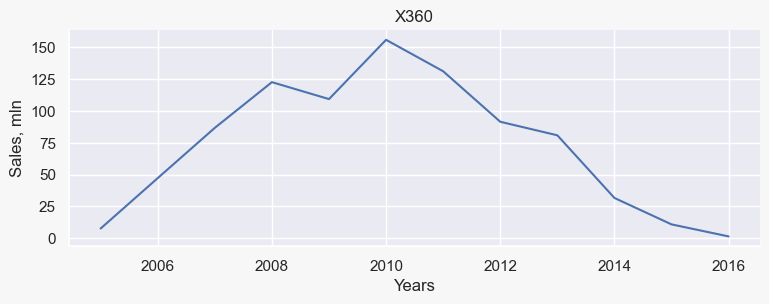

Сумма за все года: 876.3600000000001


index  na_sales  eu_sales  jp_sales  other_sales  \
platform year_of_release                                                       
Wii      2006              314443     70.86     43.62      9.15        13.52   
         2007             1386974     83.14     43.96     12.12        13.55   
         2008             2128331     97.12     46.52     12.69        14.99   
         2009             2537432    114.55     58.31     16.57        17.54   
         2010             2045874     72.64     36.31      8.78        10.22   
         2011             1192978     31.11     17.68      5.58         5.28   
         2012              241183     10.89      5.99      3.34         1.49   
         2013               96633      4.48      3.34      0.05         0.72   
         2014               44346      1.59      1.86      0.00         0.30   
         2015               42114      0.43      0.62      0.00         0.09   
         2016                8009      0.06      0.11      0.00         0.01   

                          critic_score  user_score  total_sales  
platform year_of_release                                         
Wii      2006                    214.0       223.6       123.63  
         2007                    724.3       804.4       139.22  
         2008                    866.0       972.7       156.33  
         2009                    935.1       855.5       189.43  
         2010                    502.0       441.7       117.73  
         2011                    286.3       291.1        54.37  
         2012                     38.1        66.6        20.22  
         2013                      0.0        24.1         7.87  
         2014                      0.0        12.7         3.45  
         2015                      0.0         0.0         1.05  
         2016                      0.0         0.0         0.17

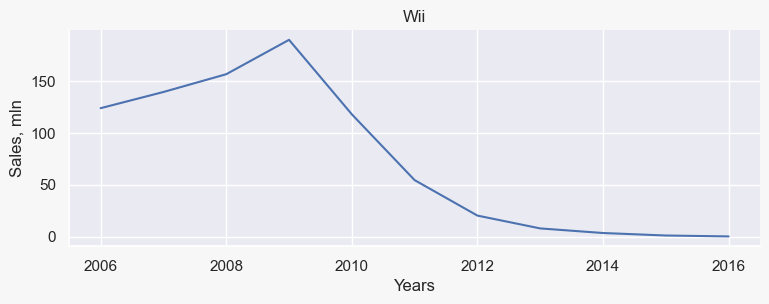

Сумма за все года: 813.4699999999999


index  na_sales  eu_sales  jp_sales  other_sales  \
platform year_of_release                                                       
PS3      2006              171829      8.84      7.38      1.08         3.66   
         2007              491360     32.16     26.10      4.22        10.71   
         2008              724999     57.23     38.73      5.82        16.74   
         2009              974350     62.65     41.40      9.03        17.85   
         2010             1106297     60.99     50.50      9.87        20.81   
         2011             1450391     64.88     56.24     14.10        21.56   
         2012             1030756     39.88     39.05     11.94        16.49   
         2013              851408     41.45     42.27     12.13        17.40   
         2014              907092     16.39     18.24      6.25         6.88   
         2015              782194      4.99      6.04      3.67         2.12   
         2016              458068      0.67      1.26      1.30         0.37   

                          critic_score  user_score  total_sales  
platform year_of_release                                         
PS3      2006                    140.7       127.5        17.30  
         2007                    567.7       519.9        62.48  
         2008                    791.4       754.0       101.78  
         2009                    833.3       806.5       113.08  
         2010                    850.6       820.2       121.36  
         2011                    950.5       908.6       135.22  
         2012                    682.1       668.0        90.87  
         2013                    609.8       591.4        95.85  
         2014                    233.3       395.1        40.88  
         2015                      6.3       154.6        14.70  
         2016                      0.0        39.7         3.23

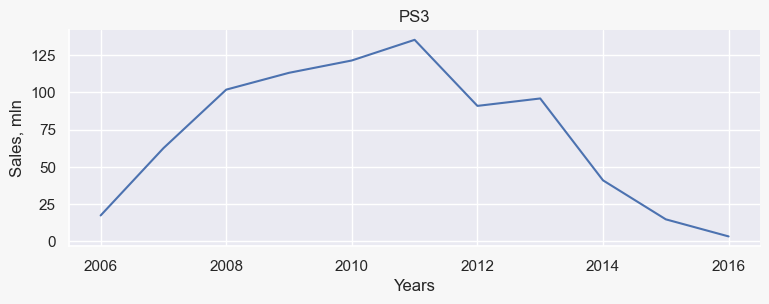

Сумма за все года: 796.75


index  na_sales  eu_sales  jp_sales  other_sales  \
platform year_of_release                                                       
DS       1985               15957      0.00      0.00      0.02         0.00   
         2004              183744      8.33      3.93      3.65         1.36   
         2005             1042640     47.99     41.49     29.86        10.80   
         2006             1884752     50.01     23.07     38.56         8.17   
         2007             3493056     75.25     33.79     26.81        11.09   
         2008             4828963     78.12     32.24     24.01        10.94   
         2009             3883350     60.95     25.83     24.21         8.55   
         2010             3206015     40.80     18.82     19.86         5.54   
         2011             1640223     14.27      5.71      4.32         1.88   
         2012              275709      4.02      2.68      3.72         0.59   
         2013               75164      0.57      0.85      0.00         0.12   

                          critic_score  user_score  total_sales  
platform year_of_release                                         
DS       1985                      0.0         0.0         0.02  
         2004                     68.2        77.0        15.91  
         2005                    460.2       418.4       119.34  
         2006                    601.6       559.9       111.64  
         2007                   1016.3       792.8       135.85  
         2008                   1181.7       858.5       134.37  
         2009                    673.8       544.0       110.99  
         2010                    379.3       254.2        79.48  
         2011                    122.9        69.8        24.30  
         2012                      8.0        16.2        10.42  
         2013                      0.0         4.8         1.42

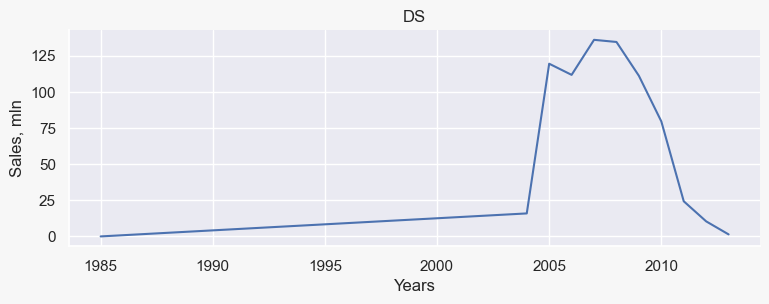

Сумма за все года: 743.74


index  na_sales  eu_sales  jp_sales  other_sales  \
platform year_of_release                                                       
PS       1994              121745      1.76      1.20      2.67         0.40   
         1995              859856     14.61      9.85      9.54         1.96   
         1996             1211490     45.42     25.92     17.82         5.54   
         1997             1234585     58.06     37.14     33.10         7.87   
         1998             1625201     83.22     48.74     28.48         9.05   
         1999             1263146     65.94     42.60     28.07         7.92   
         2000             1055129     45.94     30.55     14.60         5.28   
         2001              715190     15.84     13.72      3.86         2.17   
         2002              190346      2.78      1.89      1.64         0.36   
         2003               10949      1.15      0.78      0.00         0.14   

                          critic_score  user_score  total_sales  
platform year_of_release                                         
PS       1994                      6.9         6.3         5.63  
         1995                      0.0         0.0        34.00  
         1996                     53.9        50.0        89.16  
         1997                    127.1       110.5       128.30  
         1998                    201.9       194.0       160.44  
         1999                    250.4       209.6       136.61  
         2000                    496.0       388.5        91.09  
         2001                    260.0       265.9        33.42  
         2002                      6.9        24.7         6.31  
         2003                      0.0         0.0         1.93

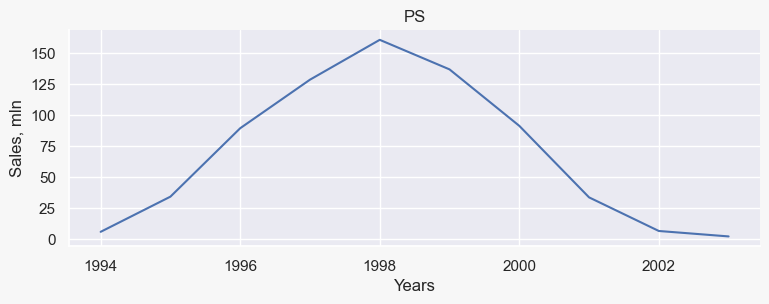

Сумма за все года: 686.89


index  na_sales  eu_sales  jp_sales  other_sales  \
platform year_of_release                                                       
GBA      2000               12300      0.05      0.02      0.00         0.00   
         2001              839616     36.24     15.92      7.46         1.91   
         2002             1829539     43.02     17.12     12.21         1.81   
         2003             1280608     33.53     13.19      8.59         1.36   
         2004             1351268     44.43     18.15     13.52         1.81   
         2005             1240784     21.70      8.31      3.27         0.58   
         2006              453776      2.70      0.98      1.51         0.09   
         2007               49680      2.45      0.90      0.00         0.05   

                          critic_score  user_score  total_sales  
platform year_of_release                                         
GBA      2000                      0.0         0.0         0.07  
         2001                    490.1       227.1        59.62  
         2002                    875.8       417.3        72.35  
         2003                    643.8       565.2        55.31  
         2004                    532.6       436.6        76.10  
         2005                    252.9       195.6        33.28  
         2006                     92.7        83.2         5.19  
         2007                      6.5         0.0         3.35

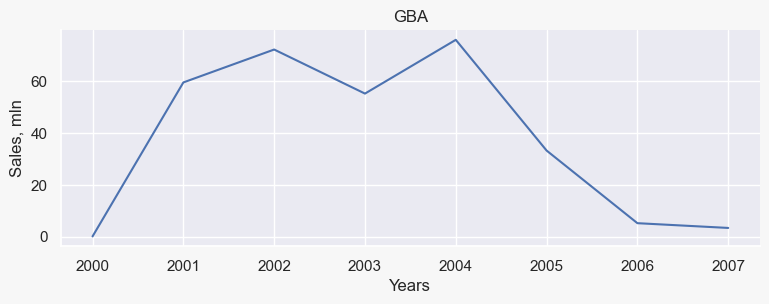

Сумма за все года: 305.27


index  na_sales  eu_sales  jp_sales  other_sales  \
platform year_of_release                                                       
PS4      2013               43567     10.13     11.05      0.94         3.87   
         2014              370301     34.75     46.50      2.97        15.78   
         2015             1030555     42.37     51.76      6.31        18.46   
         2016             1624364     21.49     31.78      5.74        10.24   

                          critic_score  user_score  total_sales  
platform year_of_release                                         
PS4      2013                    106.4        81.9        22.12  
         2014                    380.3       350.5        84.22  
         2015                    627.6       607.6       100.44  
         2016                    702.4       694.3        59.01

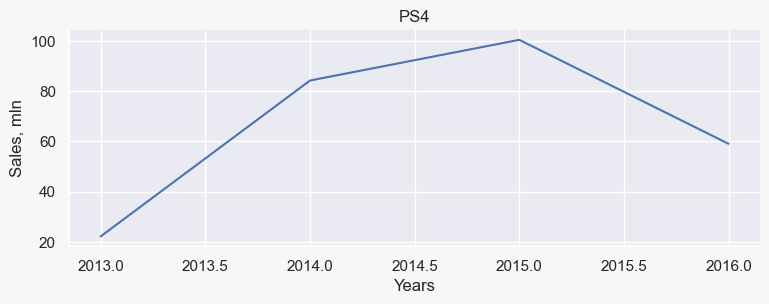

Сумма за все года: 265.79


index  na_sales  eu_sales  jp_sales  other_sales  \
platform year_of_release                                                       
PSP      2004              113463      2.25      1.70      2.03         1.08   
         2005              734683     24.48      9.71      3.22         6.43   
         2006             1886160     28.04     13.92      4.39         8.97   
         2007             1181000     18.46     14.08      5.78         8.61   
         2008              920392     11.77      7.97     10.07         4.74   
         2009             1622704     12.62     10.65      8.19         6.32   
         2010             2124948      7.46      5.82     18.16         3.60   
         2011             1568393      2.06      1.35     13.57         0.84   
         2012             1365811      0.13      0.25      7.18         0.13   
         2013              734755      0.00      0.17      2.93         0.04   
         2014              153525      0.00      0.00      0.24         0.00   
         2015               43551      0.00      0.00      0.12         0.00   

                          critic_score  user_score  total_sales  
platform year_of_release                                         
PSP      2004                     56.3        44.8         5.98  
         2005                    484.8       512.8        37.41  
         2006                    845.2       756.0        46.35  
         2007                    597.0       554.6        38.32  
         2008                    326.9       337.0        29.81  
         2009                    375.6       393.7        31.46  
         2010                    295.4       318.5        31.44  
         2011                     91.0        83.8        16.98  
         2012                      0.0        12.1         7.56  
         2013                      7.4        11.7         3.10  
         2014                      0.0         0.0         0.24  
         2015                      0.0         0.0         0.12

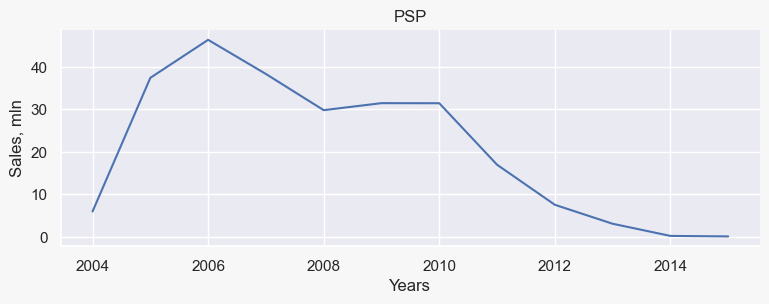

Сумма за все года: 248.77


index  na_sales  eu_sales  jp_sales  other_sales  \
platform year_of_release                                                     
GB       1988              1340      0.82      0.23      0.35         0.03   
         1989              8936     39.81      7.60     16.16         1.40   
         1990              7636      2.24      0.89      1.33         0.43   
         1991             46306      1.43      0.68      3.38         0.08   
         1992             11030     13.10      4.24      7.51         0.64   
         1994               952      6.03      2.36      3.19         0.60   
         1995             15357      0.69      0.14      2.72         0.05   
         1996             20661     12.66      9.37     12.91         1.09   
         1997             30452      2.09      0.90      3.26         0.12   
         1998             20923      9.44      7.00      9.55         0.91   
         1999             39924     16.21      8.91     11.75         1.13   
         2000             80777      6.39      3.52      8.36         1.49   
         2001             45670      2.73      1.67      4.65         0.19   

                          critic_score  user_score  total_sales  
platform year_of_release                                         
GB       1988                      0.0         0.0         1.40  
         1989                      0.0         0.0        63.57  
         1990                      0.0         0.0         4.46  
         1991                      0.0         0.0         5.49  
         1992                      0.0         0.0        24.85  
         1994                      0.0         0.0        11.58  
         1995                      0.0         0.0         3.55  
         1996                      0.0         0.0        34.94  
         1997                      0.0         0.0         6.25  
         1998                      0.0         0.0        25.99  
         1999                      0.0         0.0        36.87  
         2000                      0.0         0.0        18.27  
         2001                      0.0         0.0         9.05

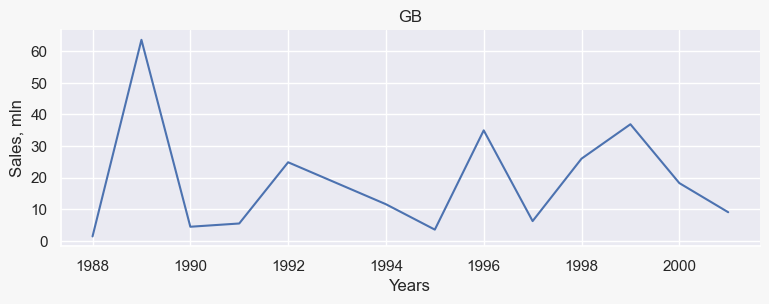

Сумма за все года: 246.27000000000004


index  na_sales  eu_sales  jp_sales  other_sales  \
platform year_of_release                                                     
NES      1983              7407      2.32      0.46      8.10         0.08   
         1984             16587     33.02      2.09     14.27         0.70   
         1985             20897     33.31      4.68     14.54         0.91   
         1986             24906     11.87      2.80     19.81         1.93   
         1987             12906      6.62      1.32     11.63         0.19   
         1988             10435     22.36      6.30     15.41         0.94   
         1989             18323      4.75      0.81      2.20         0.09   
         1990             13323      6.08      1.59      7.84         0.22   
         1991             22882      2.83      0.52      2.60         0.16   
         1992             16441      0.84      0.14      0.97         0.03   
         1993             12155      1.94      0.44      1.17         0.06   
         1994             10290      0.00      0.00      0.11         0.00   

                          critic_score  user_score  total_sales  
platform year_of_release                                         
NES      1983                      0.0         0.0        10.88  
         1984                      0.0         0.0        49.38  
         1985                      0.0         0.0        52.53  
         1986                      0.0         0.0        34.48  
         1987                      0.0         0.0        19.57  
         1988                      0.0         0.0        44.07  
         1989                      0.0         0.0         7.76  
         1990                      0.0         0.0        15.51  
         1991                      0.0         0.0         5.95  
         1992                      0.0         0.0         1.95  
         1993                      0.0         0.0         3.55  
         1994                      0.0         0.0         0.11

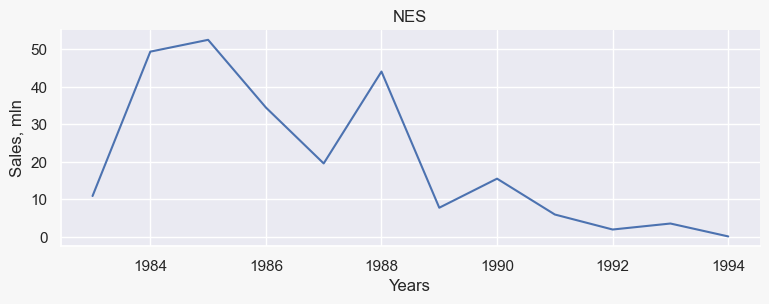

Сумма за все года: 245.73999999999998


index  na_sales  eu_sales  jp_sales  other_sales  \
platform year_of_release                                                      
3DS      2011             975051     27.34     18.63     12.83         4.40   
         2012             751974     17.11     11.68     19.98         2.59   
         2013             828671     15.56     14.84     23.57         2.60   
         2014             783431     12.33      8.73     20.69         2.01   
         2015             860693      6.17      5.06     15.52         1.03   
         2016             486197      4.14      2.33      8.03         0.64   

                          critic_score  user_score  total_sales  
platform year_of_release                                         
3DS      2011                    388.7       369.9        58.80  
         2012                    240.9       243.7        48.77  
         2013                    133.4       165.5        53.97  
         2014                    144.8       145.0        41.75  
         2015                    135.1       159.2        26.75  
         2016                     71.9        88.4        14.50

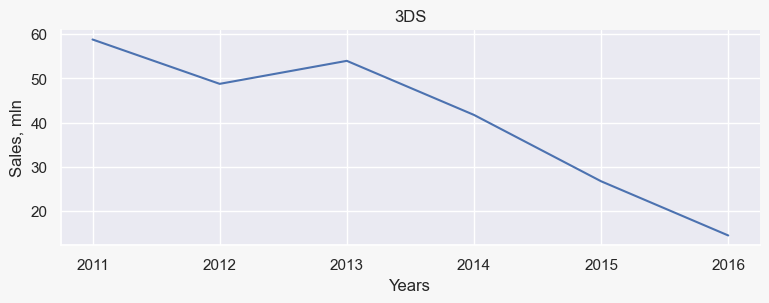

Сумма за все года: 244.54


index  na_sales  eu_sales  jp_sales  other_sales  \
platform year_of_release                                                       
XB       2000                2076      0.74      0.21      0.00         0.04   
         2001              190494     16.61      4.65      0.37         0.63   
         2002             1372644     34.05     11.78      0.49         1.69   
         2003             1668254     39.34     13.49      0.30         1.91   
         2004             1505109     48.47     14.62      0.20         2.13   
         2005             1601475     34.84     12.49      0.02         1.73   
         2006              668485      7.47      2.25      0.00         0.32   
         2007               25399      0.41      0.12      0.00         0.02   
         2008                8184      0.13      0.04      0.00         0.01   

                          critic_score  user_score  total_sales  
platform year_of_release                                         
XB       2000                      7.9         8.5         0.95  
         2001                    231.4       198.4        21.63  
         2002                    961.6       788.5        46.32  
         2003                   1125.1      1027.7        53.13  
         2004                   1092.8       994.3        63.29  
         2005                   1122.3       971.4        47.35  
         2006                    372.6       280.8         9.72  
         2007                     22.1        21.7         0.53  
         2008                      0.0         5.5         0.17

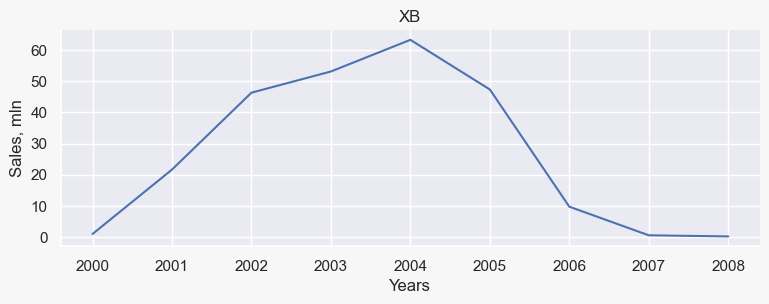

Сумма за все года: 243.09


index  na_sales  eu_sales  jp_sales  other_sales  \
platform year_of_release                                                       
PC       1985               14470      0.00      0.03      0.00         0.01   
         1988               14621      0.00      0.02      0.00         0.01   
         1992               46333      1.26      1.66      0.00         0.11   
         1994               18766      5.56      6.85      0.00         0.46   
         1995               15854      1.72      2.27      0.00         0.23   
         1996                3879      5.56      4.68      0.00         0.34   
         1997               35490      8.76      2.19      0.09         0.23   
         1998               80963      3.05      0.20      0.00         0.01   
         1999               59755      3.50      1.13      0.00         0.11   
         2000               66213      3.03      1.45      0.00         0.18   
         2001              173466      4.08      1.24      0.00         0.15   
         2002              239525      5.03      3.18      0.00         0.36   
         2003              389480      3.41      4.92      0.00         0.51   
         2004              376676      2.54      7.54      0.08         0.23   
         2005              473046      1.39      2.69      0.00         0.29   
         2006              731356      0.61      1.94      0.00         0.30   
         2007              845440      2.77      6.21      0.00         0.30   
         2008              957830      0.58      9.85      0.00         1.99   
         2009             1399740      1.42     13.50      0.00         1.99   
         2010              983867      9.19     12.12      0.00         2.97   
         2011             1460866     10.76     18.94      0.00         5.33   
         2012              590005      8.01     12.40      0.00         2.81   
         2013              338319      3.88      7.39      0.00         1.11   
         2014              459896      3.51      8.87      0.00         0.90   
         2015              550923      2.36      5.57      0.00         0.59   
         2016              673377      1.36      3.53      0.00         0.36   

                          critic_score  user_score  total_sales  
platform year_of_release                                         
PC       1985                      5.9         5.8         0.03  
         1988                      6.4         2.2         0.02  
         1992                      8.5         8.2         2.92  
         1994                      0.0         0.0        12.41  
         1995                      0.0         0.0         3.99  
         1996                     18.0        17.2        10.24  
         1997                     17.9        42.0        11.04  
         1998                     27.2        69.7         3.25  
         1999                     18.3        26.7         4.63  
         2000                     35.2        48.6         4.48  
         2001                     88.6        92.3         5.32  
         2002                    139.0       140.4         8.21  
         2003                    218.0       245.4         8.33  
         2004                    209.2       202.4        10.16  
         2005                    225.6       233.4         4.08  
         2006                    309.0       337.4         2.55  
         2007                    384.5       403.6         8.98  
         2008                    404.2       419.5        10.43  
         2009                    583.2       602.2        14.92  
         2010                    445.4       457.1        21.31  
         2011                    661.6       656.4        29.70  
         2012                    375.9       352.5        20.41  
         2013                    241.6       203.4        11.27  
         2014                    289.6       239.5        12.38  
         2015                    254.3       245.5         7.93  
     

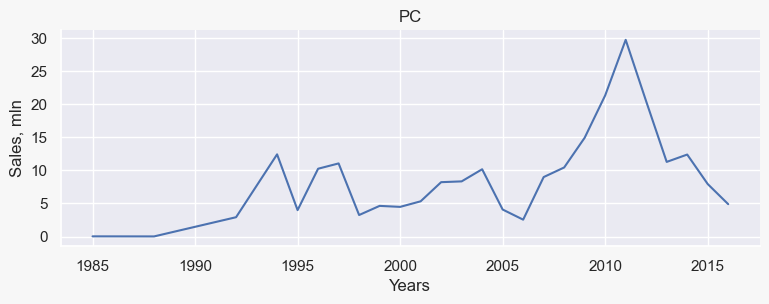

Сумма за все года: 233.88


index  na_sales  eu_sales  jp_sales  other_sales  \
platform year_of_release                                                      
N64      1996              88075     21.03      6.72      5.77         0.58   
         1997             277315     25.84      8.09      4.66         0.91   
         1998             512479     31.39     10.35      6.54         0.96   
         1999             692379     38.77      9.74      8.54         0.82   
         2000             421332     19.74      5.59      7.72         0.92   
         2001              56847      2.08      0.52      0.53         0.12   
         2002              11498      0.06      0.02      0.00         0.00   

                          critic_score  user_score  total_sales  
platform year_of_release                                         
N64      1996                      0.0         0.0        33.52  
         1997                      0.0         0.0        38.59  
         1998                      0.0         0.0        48.28  
         1999                      0.0         0.0        57.05  
         2000                      0.0         0.0        33.05  
         2001                      0.0         0.0         3.13  
         2002                      0.0         0.0         0.08

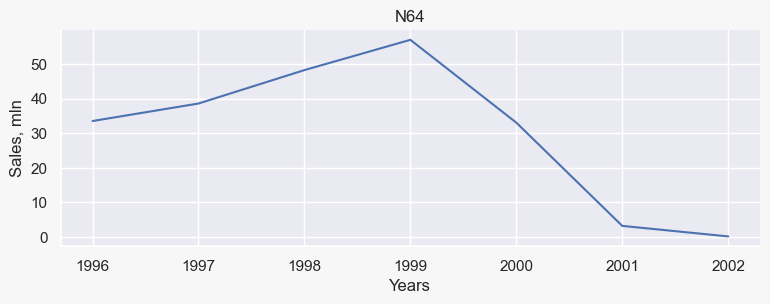

Сумма за все года: 213.70000000000002


In [22]:
# Напишем цикл, который построит сразу все графики для всех платформ
platform_birthday = []
platdorm_dieday = []
for i in platforms:
    title = i
    this_platform = df_platforms.query(f'platform == "{i}"')
    a = list(df.query(f'platform == "{i}"')['year_of_release'].sort_values().unique())
    b = list(this_platform.total_sales)
    display(df_platforms.query(f'platform == "{i}"'))
    ax = sns.relplot(x=a, y=b, kind='line', height=3, aspect=2.62)
    ax.set(xlabel='Years', ylabel='Sales, mln', title=i)
    sns.set(rc={'figure.facecolor': '#F7F7F7'})
    plt.show()
    # fig, bx = plt.subplots(figsize=(11, 2))
    # bx = sns.boxplot(x=c)
    # plt.show()
    platform_birthday.append(this_platform.index[0][1])
    platdorm_dieday.append(this_platform.index[-1][1])
    print('Сумма за все года:', this_platform.total_sales.sum())

In [23]:
# наш замечательный цикл собрал 2 листа - дни появления платформ и дни их смерти.
# Сейчас сделаем вывобы во сколько лет в среднем появляются новые и исчезают старые платформы
platform_birthday.sort()
platdorm_dieday.sort()
platdorm_dieday.pop()
platdorm_dieday.pop()
platdorm_dieday.pop()
platdorm_dieday.pop()
platdorm_dieday.pop()
platdorm_dieday.pop()
print(platform_birthday, platdorm_dieday)

[1983, 1985, 1985, 1988, 1994, 1996, 2000, 2000, 2000, 2004, 2005, 2006, 2006, 2011, 2013] [1994, 2001, 2002, 2003, 2007, 2008, 2011, 2013, 2015]


In [24]:
platform_birthday[0]

1983

In [25]:
s = 0

platform_birthday[s+1] - platform_birthday[s]

2

In [26]:
k = []
j = 0
for i in platform_birthday:
    if i != 2013:
        a = platform_birthday[j+1] - platform_birthday[j]
        j += 1
        k.append(a)
    else:
        print('Медианное время выхода новой платформы: ', median(k), 'года')
k

Медианное время выхода новой платформы:  2.0 года


[2, 0, 3, 6, 2, 4, 0, 0, 4, 1, 1, 0, 5, 2]

In [27]:
k = []
j = 0
for i in platdorm_dieday:
    if i != 2015:
        a = platdorm_dieday[j+1] - platdorm_dieday[j]
        j += 1
        k.append(a)
    else:
        print('Медианное время смерти платформы: ', median(k), 'года')
k

Медианное время смерти платформы:  2.0 года


[7, 1, 1, 4, 1, 3, 2, 2]

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 <a class="tocSkip"> </h2>

Замечательная работа с циклом, молодец! 

<div class="alert alert-info">
Выводы по графикам:
    В среднем, новые платформы появляются примерно каждые 2 года. И Исчезают кстати также.
    По графикам видно что в большинстве случаев при выходе платформы идет бурный рост (2-4 года)
    а затем спад.
</div

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 v_2 <a class="tocSkip"> </h2>

Очень хорошо, также можно рассчитать средний/медианный срок жизни платформы)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 🤔<a class="tocSkip"></h2>
    <s>
Какой вывод мы можем сделать на основе полученных графиков?) Давай добавим)

#### Актуализируем платформы

Отфильтруем только актуальные платформы (теперь работаем с выборкой после 2014 года)

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 v_2 <a class="tocSkip"> </h2>

Актуальный период выбран верно)

In [28]:
actual_platforms = df_platforms.query('year_of_release > 2014').groupby('platform').sum().\
sort_values('total_sales', ascending=False)
actual_platforms.total_sales

platform
PS4     159.45
XOne     78.58
3DS      41.25
WiiU     19.47
PS3      17.93
PC       12.82
X360     12.26
PSV      10.03
Wii       1.22
PSP       0.12
Name: total_sales, dtype: float64

#### **Вывод:**

 PS4, XOne, 3DS остаются актуальными среди всех платформ в 2016 году. Лучшие показатели у 4-й плойки. Остальные платформы упали несколько лет назад практически до 0.
 При этом падегние с 2014 по 2016 год достаточно ощутимое по всем платформам

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
    
 Да, согласна с твоими выводами, PS4,3DS и XOne могут считаться потенциально прибыльными платформами для 2017 г.!
</div>   

#### Построим ящик с усами для всех актуальных платформ

<div class="alert alert-info">
Сделано! V2
</div

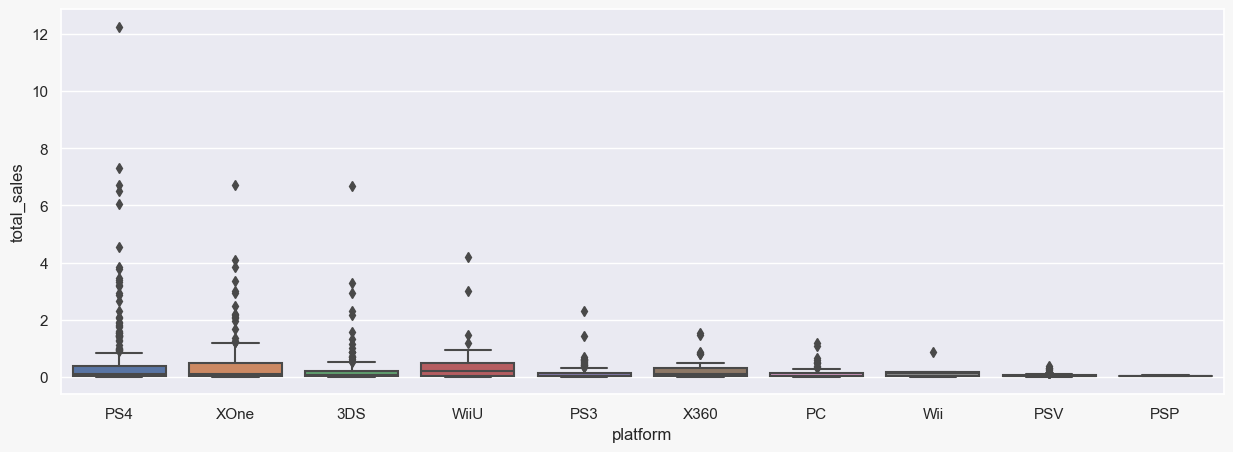

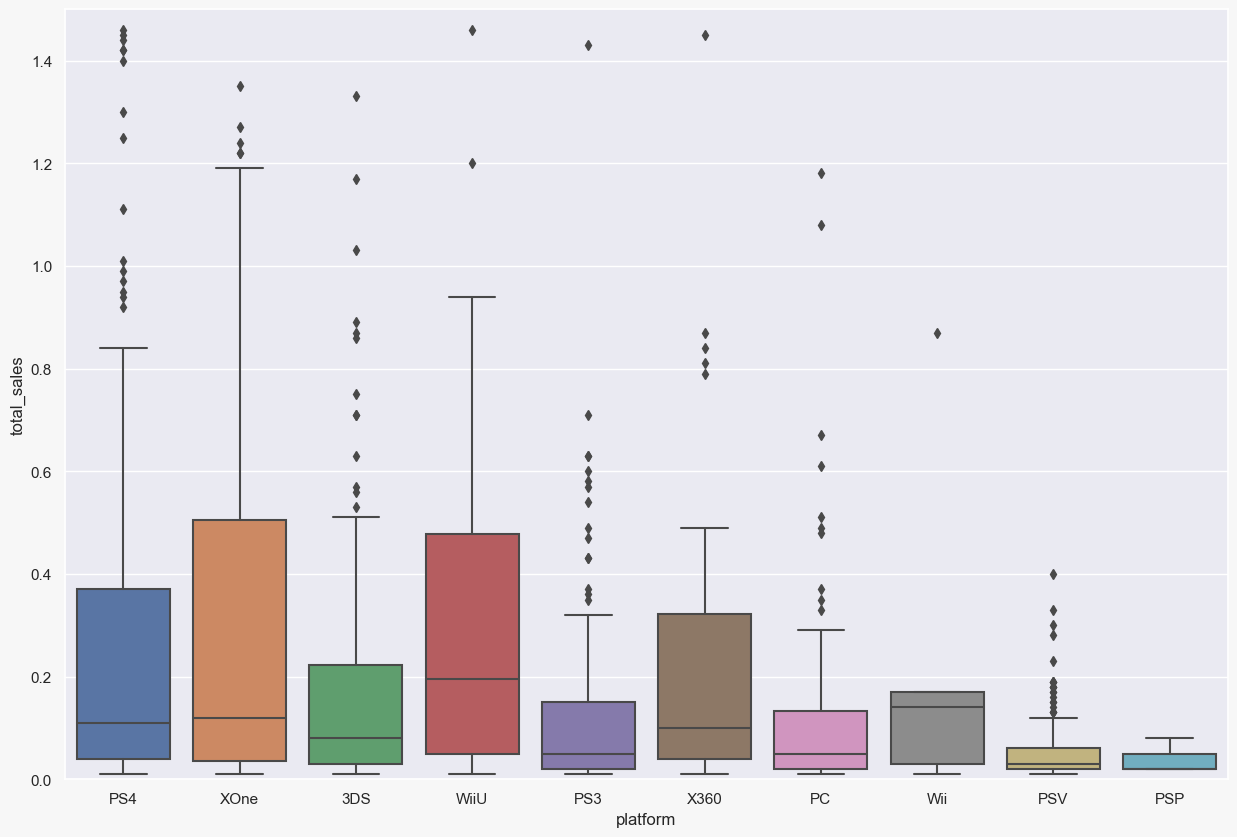

Платформа:  PS4
count    301.000000
mean       0.529734
std        1.225797
min        0.010000
25%        0.040000
50%        0.110000
75%        0.370000
max       12.250000
Name: total_sales, dtype: float64

Платформа:  XOne
count    167.000000
mean       0.470539
std        0.878354
min        0.010000
25%        0.035000
50%        0.120000
75%        0.505000
max        6.710000
Name: total_sales, dtype: float64

Платформа:  3DS
count    132.000000
mean       0.312500
std        0.758443
min        0.010000
25%        0.030000
50%        0.080000
75%        0.222500
max        6.690000
Name: total_sales, dtype: float64

Платформа:  WiiU
count    42.000000
mean      0.463571
std       0.797563
min       0.010000
25%       0.050000
50%       0.195000
75%       0.477500
max       4.180000
Name: total_sales, dtype: float64

Платформа:  PS3
count    111.000000
mean       0.161532
std        0.291411
min        0.010000
25%        0.020000
50%        0.050000
75%        0.150000
max   

In [29]:
pl_list = list(actual_platforms.index)
df_clean = df.query((f'platform in {pl_list}') and ('year_of_release > 2014'))
fig, bx = plt.subplots(figsize=(15, 5))
bx = sns.boxplot(x='platform', y='total_sales', data=df_clean)
plt.show()
fig, by = plt.subplots(figsize=(15, 10))
by = sns.boxplot(x='platform', y='total_sales', data=df_clean)
plt.ylim(0, 1.5)
plt.show()
pd.options.display.expand_frame_repr = False

for i in pl_list:
    print('Платформа: ', i)
    pd.options.display.expand_frame_repr = False
    print(df_clean.query(f'platform == "{i}"')['total_sales'].describe(), end='')
    print('')
    print('')

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>

Надо очень осторожно относится к данным, которые выпадают из общей картины датасета. В бизнесе часто выброс говорит не о случайном событии, а о новой нарождающейся тенденции. И задача аналитика не математически обсчитать прошлое, а выявить что влияет на будущее.
    
Что является выбросом в конкретном случае зависит от контекста задачи, как собирались данные датасета, возможна ли ошибка или случайное занесение не правильных данных.
    
Если потолок высотой в 100 метров, как в проекте EDA, то там явная ошибка и она возможна, так как клиент сам вводит данные в объявление и верификация таких данных отсутствует.
    
Покупка миллионами пользователей какой-то игры, вряд ли случайна, даже если это флэшмоб, но эти пользователи платили собственные деньги и значит действовали осознанно. Значит высокие продажи игры обусловлены удачным сюжетом, отличной графикой, быстрым движком и огромным рекламным бюджетом. Что совершенно не случайно.
    
Аналогично с оценками пользователей и критиков. Это не случайные оценки каждого пользователя, кому что понравилось. А это интегральная оценка большого количества игроков. А подробнее о природе выбросов хорошо написано вот в этой статье:
https://towardsdatascience.com/outliers-analysis-a-quick-guide-to-the-different-types-of-outliers-e41de37e6bf6


<div class="alert alert-info">
Вывод
</div

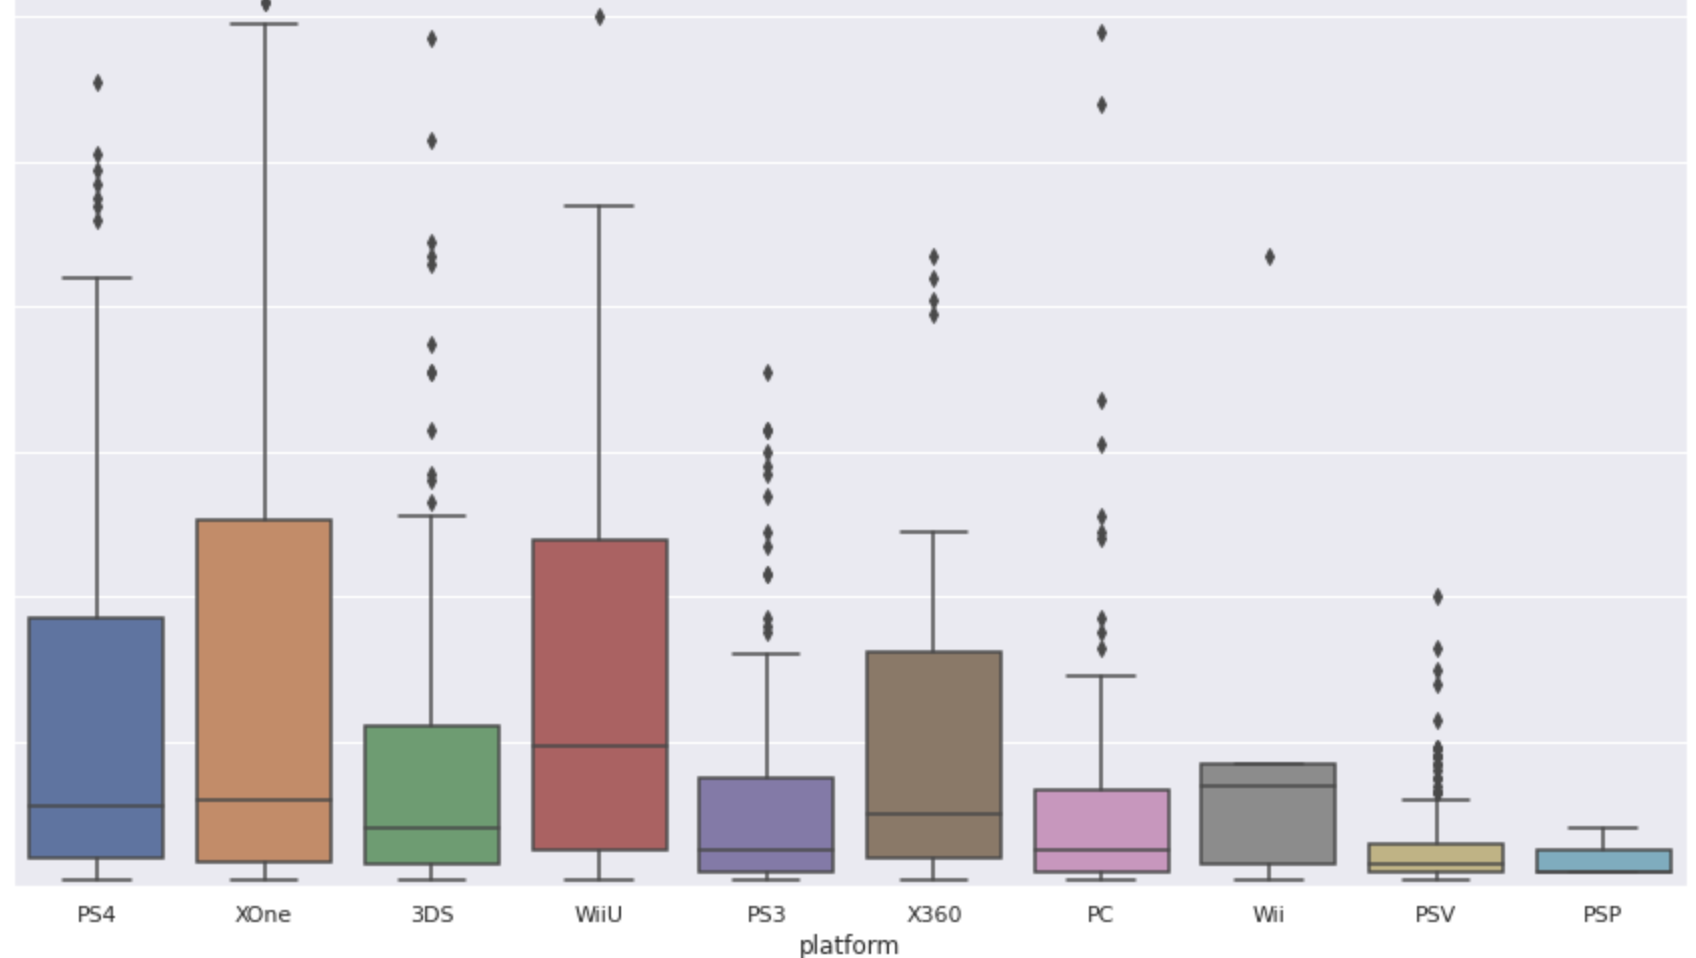

- Если смотреть по медиане, то лучшие показатели у WiiU, однако у XOne и PS4 большие квантили за счет выбросов.

- А это значит что у них большое стандартное отклонение и большие максимумы. На платформе PS4 одна игра зашла аж на 12 миллионов!

- У всех 3-х топовых платформ есть суперхитовые игры с огромным кол-вом продаж!

### Влияние отзывов пользователей и критиков на платформе PS4

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [30]:
df[:3]

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,74.09
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,39.47
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,32.23


,critic_score,user_score,total_sales
31,NaN,NaN,12.25
77,8.2,4.3,7.30
87,NaN,NaN,6.70


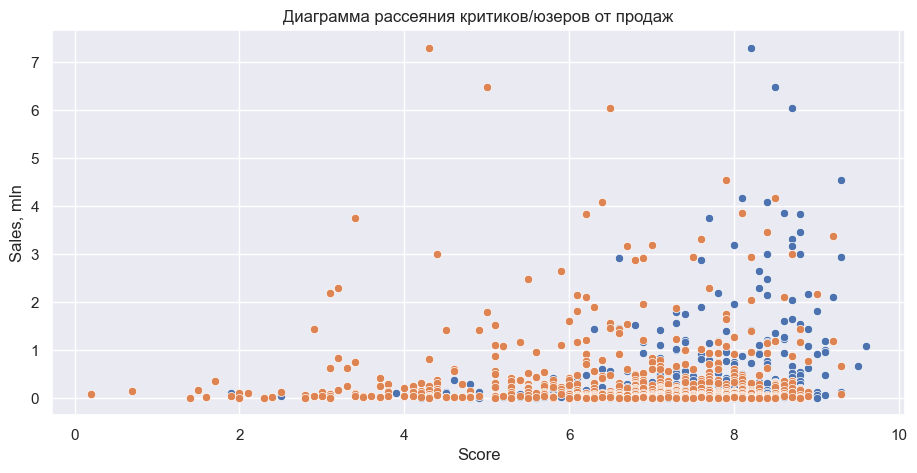

Коэффициент корреляции прирсона для критиков:  0.3282851027743706
Коэффициент корреляции прирсона для юзеров:  0.0008284907454412754


In [31]:
df_PS4 = df.query(('platform == "PS4"') and ('year_of_release > 2014'))[['critic_score', 'user_score', 'total_sales']]
display(df_PS4[:3])
a = df_PS4['critic_score']
b = df_PS4['user_score']
c = df_PS4['total_sales']
sns.set(rc={'figure.figsize':(11,5)})
sx = sns.scatterplot(data=df_PS4, x=a, y=c)
ax.set(xlabel='Score', ylabel='Sales, mln', title='Диаграмма рассеяния критиков/юзеров от продаж')
gx = sns.scatterplot(data=df_PS4, x=b, y=c)
gx.set(xlabel='Score', ylabel='Sales, mln', title='Диаграмма рассеяния критиков/юзеров от продаж')
plt.show()
# sns.pairplot(df_PS4)
print('Коэффициент корреляции прирсона для критиков: ', df_PS4['critic_score'].corr(df_PS4['total_sales']))
print('Коэффициент корреляции прирсона для юзеров: ', df_PS4['user_score'].corr(df_PS4['total_sales']))
#plot(x=a, y=b, kind='scatter')

- Есть совсем небольшая зависимость продаж от оценки критиков
- При этом практически отсутствует зависимость от оценок пользователей

Посмотрим все платформы на данную корреляцию:



Платформа: PS4


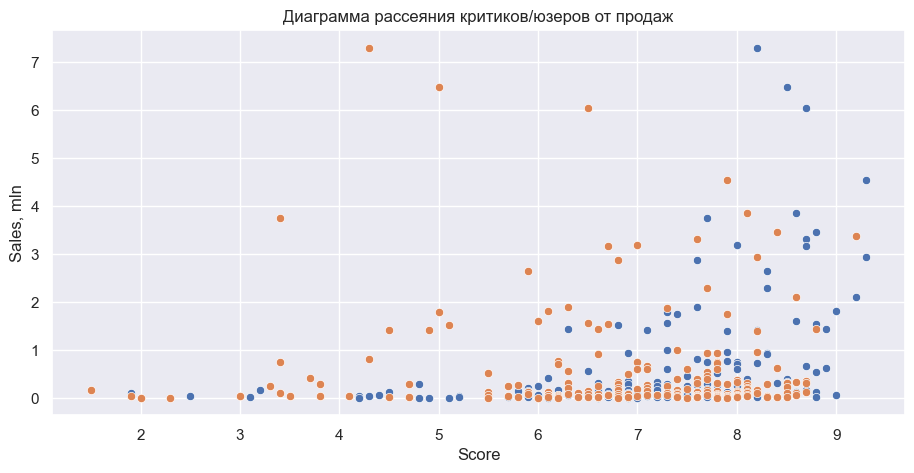

Коэффициент корреляции прирсона для критиков:  0.3922191777830651
Коэффициент корреляции прирсона для юзеров:  -0.058605538703824275


Платформа: 3DS


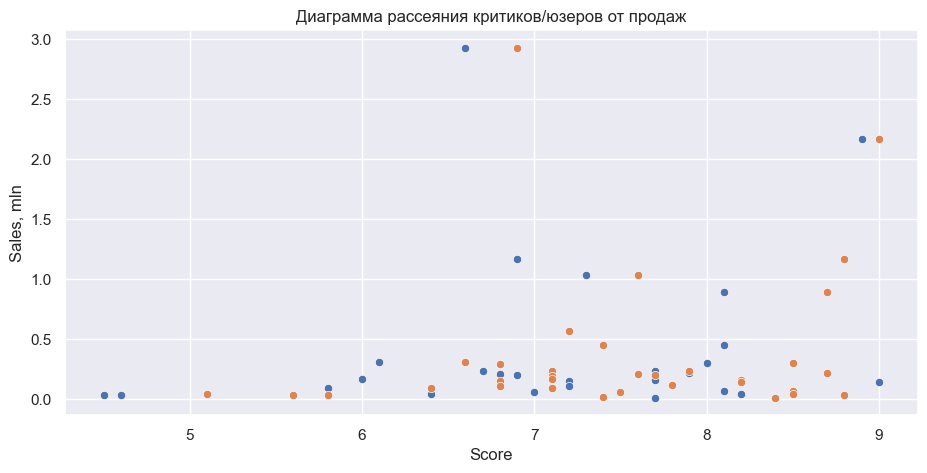

Коэффициент корреляции прирсона для критиков:  0.1713912894257839
Коэффициент корреляции прирсона для юзеров:  0.1930259868264962


Платформа: PC


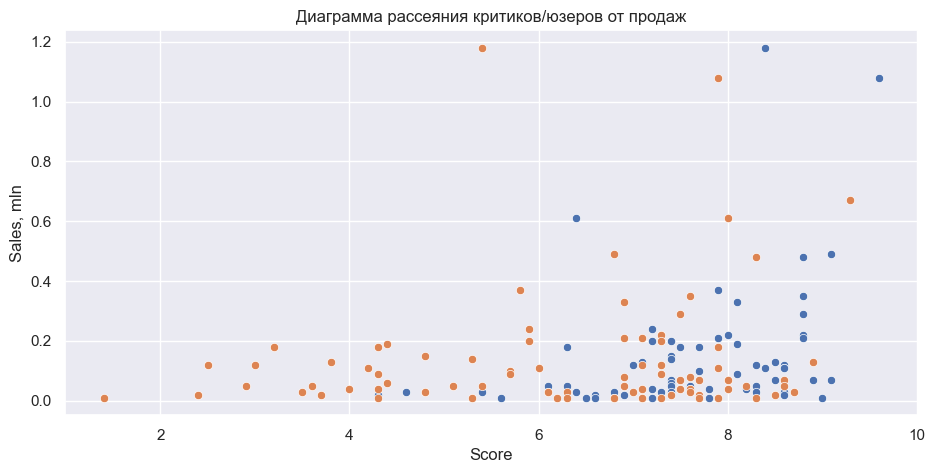

Коэффициент корреляции прирсона для критиков:  0.3764803468030028
Коэффициент корреляции прирсона для юзеров:  0.15141723954280037


In [32]:
for i in platforms:
    df_2014 = df.query('year_of_release > 2014')
    df_corr = df_2014.query((f'platform == "{i}"'))\
    [['critic_score', 'user_score', 'total_sales']]
    # добавим условие что отзывы есть
    if (df_corr['critic_score'].count() > 1) and (df_corr['user_score'].count() > 1):
        print()
        print()
        print(f'Платформа: {i}')
        a = df_corr['critic_score']
        b = df_corr['user_score']
        c = df_corr['total_sales']
        sns.set(rc={'figure.figsize':(11,5)})
        sx = sns.scatterplot(data=df_corr, x=a, y=c)
        ax.set(xlabel='Score', ylabel='Sales, mln', title='Диаграмма рассеяния критиков/юзеров от продаж')
        gx = sns.scatterplot(data=df_corr, x=b, y=c)
        gx.set(xlabel='Score', ylabel='Sales, mln', title='Диаграмма рассеяния критиков/юзеров от продаж')
        plt.show()
        print('Коэффициент корреляции прирсона для критиков: ', df_corr['critic_score'].corr(df_corr['total_sales']))
        print('Коэффициент корреляции прирсона для юзеров: ', df_corr['user_score'].corr(df_corr['total_sales']))
    else:
        ''

##### **Вывод:**

Ни на одну платформу существенно не влияет рейтинг, однако можно заметить что везде отзывы критиков больше коррелируют с продажами нежели отзывы юзеров

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
    
Прекрасная работа по корреляционному анализу, расчеты проведены верно, а оформление на высоте, молодец!)

<div class="alert alert-info">
Обновил! V2
</div

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 v_3 <a class="tocSkip"> </h2>

👍 Теперь все отлично)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 🤔 v_2 <a class="tocSkip"></h2>
<s>
Давай обновим данные по актуальному периоду)

### Распределение игр по жанрам

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [33]:
df_2014['genre'].value_counts()

Action          431
Role-Playing    132
Adventure       110
Sports          107
Shooter          81
Misc             71
Racing           42
Fighting         37
Simulation       33
Strategy         29
Platform         28
Puzzle            7
Name: genre, dtype: int64

In [34]:
df_genres = df_2014.pivot_table(index='genre', values='total_sales', aggfunc='mean').\
sort_values(by='total_sales', ascending=False)

<AxesSubplot: xlabel='genre', ylabel='total_sales'>

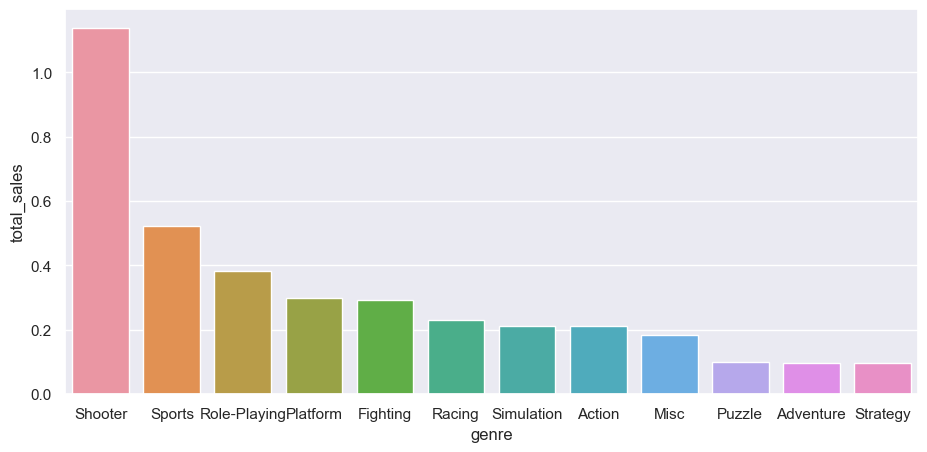

In [35]:
sns.barplot(data=df_genres, x=df_genres.index, y=df_genres['total_sales'])

##### **Вывод:**

Рассмотрели средние продажи по жанрам, учитывая комментарий ниже)
Несмотря на то что у Action и Sport самое большое кол-во продаж, по средним значениям
хорошие показатели у Shooter, Sports, Role-Playing. Эти жанры стабильно приносят высокий доход, особенно Shooter
так как их средняя выручка наиболее большая

## Портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Оценка региона NA

In [36]:
# Просто для наглядности
df[:5]

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,74.09
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,39.47
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,32.23
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,29.82
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,30.38


In [37]:
# Напишем функцию, на входе у которой регион, а на выходе сводная таблица с топ 5 платформами и топ 5 жанрами с долями.
def bulid_me_region_analyse(region, rt_tab='no'):
        # Создадим сводную таблицу для платформ
        df_actual = df.query('year_of_release > 2014')
        df_ptf = df_actual.pivot_table(index='platform', values=[f'{region}_sales', 'total_sales'], \
                      aggfunc='sum')
        df_ptf.columns = ('region_sales_sum','total_sum')
        df_ptf['rate'] = (df_ptf['region_sales_sum'] / df_ptf['total_sum']).apply("{:.02f}".format)
        df_ptf['rate'] = df_ptf['rate'].astype('float64')
        df_ptf = df_ptf.sort_values(['region_sales_sum', 'rate'], ascending=False)
        df_ptf = df_ptf[:5]
        
        # Создадим сводную таблицу для жанров
        
        df_gnr = df_actual.pivot_table(index='genre', values=[f'{region}_sales', 'total_sales'], \
                      aggfunc='sum')
        df_gnr.columns = ('region_sales_sum','total_sum')
        df_gnr['rate'] = (df_gnr['region_sales_sum'] / df_gnr['total_sum']).apply("{:.02f}".format)
        df_gnr['rate'] = df_gnr['rate'].astype('float64')
        df_gnr = df_gnr.sort_values(['region_sales_sum', 'rate'], ascending=False)
        df_gnr = df_gnr[:5]
        
        # Создадим условие - если мы хотим получить графики - то rt_tab не прописан,
        # А если хотим получить просто таблицу (пригодится потом), то прописываем какую - для платформ или жанров
        
        if rt_tab == 'no':
            print('Анализ данных платформ по региону', str.upper(region), ':'), display(df_ptf)
            print('Продажи в данном регионе')
            sns.barplot(data=df_ptf, x=df_ptf.index, y=df_ptf['region_sales_sum'], alpha=1)
            print('Доля продаж в этом регионе от всех продаж')
            sns.barplot(data=df_ptf, x=df_ptf.index, y=df_ptf['rate']*100, color = 'black', alpha=0.3)
            plt.show()
            print()
            print('------------------------------------------------------------------------------------')
            print()
            print('Анализ данных жанров по региону', str.upper(region), ':'), display(df_gnr)
            print('Продажи в данном регионе')
            sns.barplot(data=df_gnr, x=df_gnr.index, y=df_gnr['region_sales_sum'], alpha=1)
            print('Доля продаж в этом регионе от всех продаж')
            sns.barplot(data=df_gnr, x=df_gnr.index, y=df_gnr['rate']*100, color ='black', alpha=0.3)
            plt.show()
        # Если мы хотим чтобы функция отдала нам сводную таблицу с платформами
        elif rt_tab == 'platform':
            df_ptf['region'] = region
            return df_ptf
        # Если мы хотим чтобы функция отдала нам сводную таблицу с жанрами
        elif rt_tab == 'genre':
            df_gnr['region'] = region
            return df_gnr

Анализ данных платформ по региону NA :


,region_sales_sum,total_sum,rate
platform,,,
PS4,63.86,159.45,0.40
XOne,50.30,78.58,0.64
3DS,10.31,41.25,0.25
WiiU,8.86,19.47,0.46
X360,8.05,12.26,0.66


Продажи в данном регионе
Доля продаж в этом регионе от всех продаж


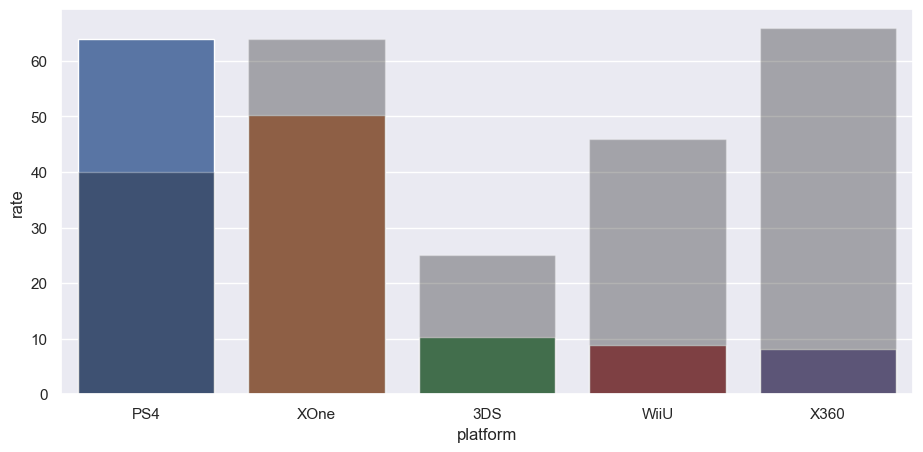


------------------------------------------------------------------------------------

Анализ данных жанров по региону NA :


,region_sales_sum,total_sum,rate
genre,,,
Shooter,48.18,92.25,0.52
Action,33.68,91.55,0.37
Sports,26.31,55.78,0.47
Role-Playing,19.82,50.44,0.39
Misc,5.58,13.03,0.43


Продажи в данном регионе
Доля продаж в этом регионе от всех продаж


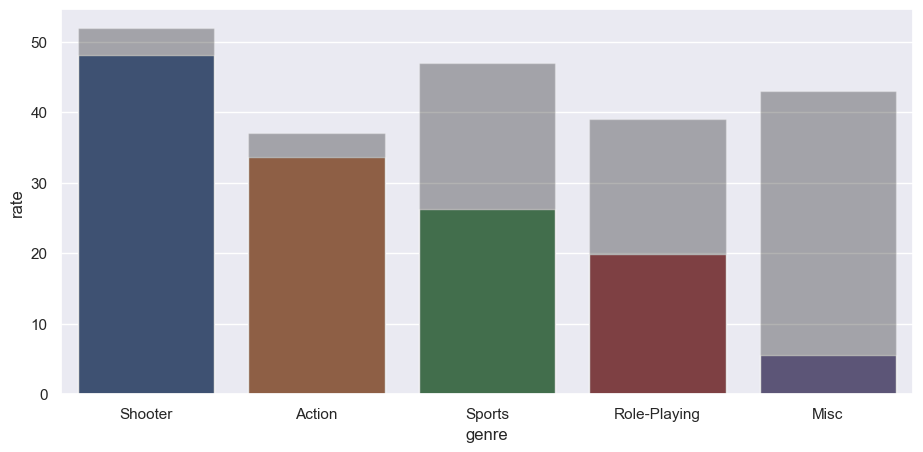

In [38]:
bulid_me_region_analyse('na')

##### **Вывод по региону NA:**

- Самые популярные платформы: XOne и PS4
- При этом самая большая доля продаж также у XOne и PS4

- По жанрам - Shooter & Action популярнее остальных
- Sport выделяется хорошей долей

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Очень крутая реализация, осталось обновить данные и выводы по актуальному периоду)

#### Оценка региона EU

Анализ данных платформ по региону EU :


,region_sales_sum,total_sum,rate
platform,,,
PS4,83.54,159.45,0.52
XOne,28.10,78.58,0.36
PC,9.10,12.82,0.71
3DS,7.39,41.25,0.18
PS3,7.30,17.93,0.41


Продажи в данном регионе
Доля продаж в этом регионе от всех продаж


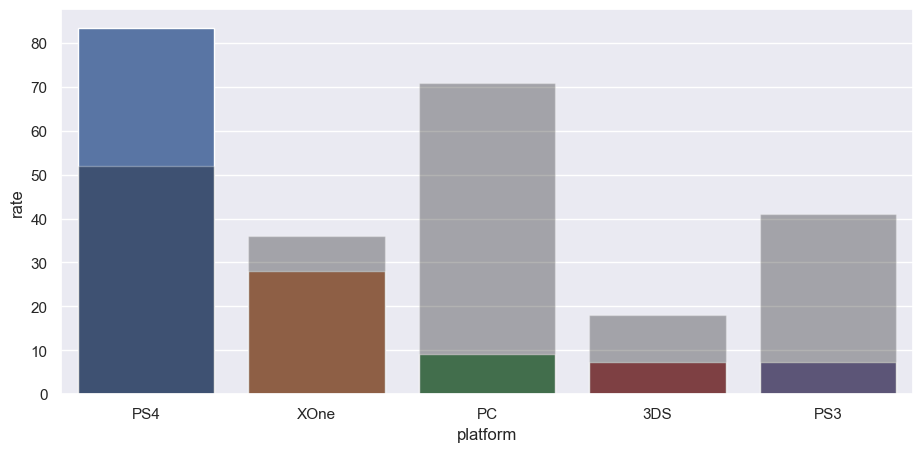


------------------------------------------------------------------------------------

Анализ данных жанров по региону EU :


,region_sales_sum,total_sum,rate
genre,,,
Shooter,40.28,92.25,0.44
Action,34.82,91.55,0.38
Sports,27.82,55.78,0.50
Role-Playing,17.21,50.44,0.34
Racing,6.52,9.63,0.68


Продажи в данном регионе
Доля продаж в этом регионе от всех продаж


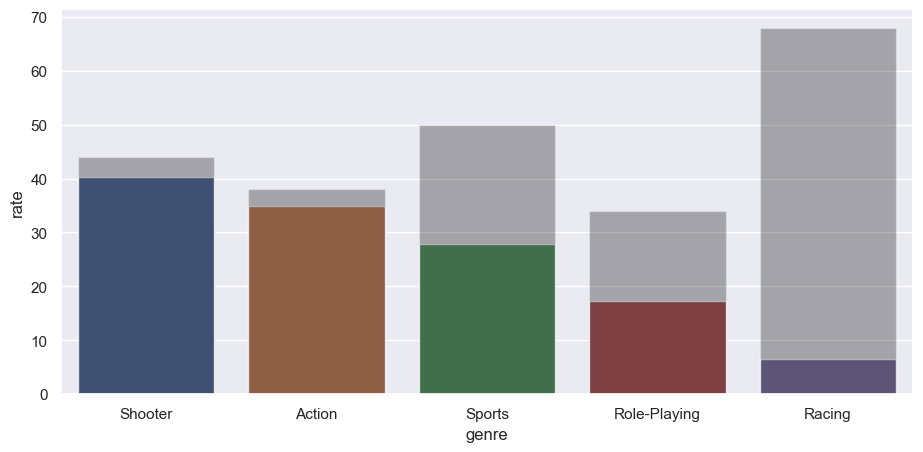

In [39]:
bulid_me_region_analyse('eu')

##### **Вывод по региону EU:**

- Самые популярные платформы: PS4 в отрыве от всех. XOne уступает
- При этом самая большая доля продаж также у PS4

- По жанрам - популярны все те же - Shooter, Action, Sport
- По конверсиям немного Sport лучше.

#### Оценка региона JP

Анализ данных платформ по региону JP :


,region_sales_sum,total_sum,rate
platform,,,
3DS,23.55,41.25,0.57
PS4,12.05,159.45,0.08
PSV,8.41,10.03,0.84
PS3,4.97,17.93,0.28
WiiU,4.12,19.47,0.21


Продажи в данном регионе
Доля продаж в этом регионе от всех продаж


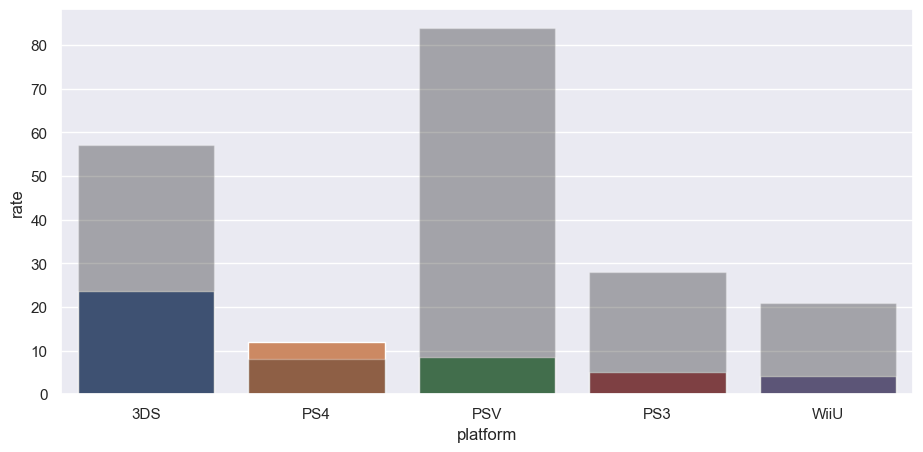


------------------------------------------------------------------------------------

Анализ данных жанров по региону JP :


,region_sales_sum,total_sum,rate
genre,,,
Action,23.05,91.55,0.25
Role-Playing,13.41,50.44,0.27
Shooter,3.79,92.25,0.04
Misc,3.19,13.03,0.24
Adventure,2.22,10.73,0.21


Продажи в данном регионе
Доля продаж в этом регионе от всех продаж


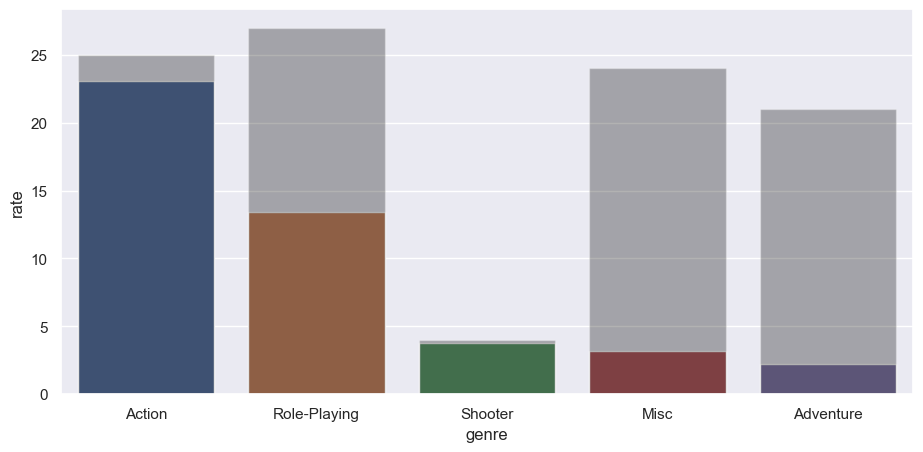

In [40]:
bulid_me_region_analyse('jp')

##### **Вывод по региону JP:**

- Самые популярные платформы: 3DS. PS4 и PSV отстают не слабо
- При этом самая большая доля продаж у PSV, что дает надежду ей.

- По жанрам - Action и Role-Playing. Конверся этих двух высокая.
- Shooter тут не заходит

,NA RATE,EU RATE,JP RATE
platform,,,
PS4,0.40,0.52,0.08
XOne,0.64,0.36,0.00
3DS,0.25,0.18,0.57
WiiU,0.46,0.00,0.21
X360,0.66,0.00,0.00
PC,0.00,0.71,0.00
PS3,0.00,0.41,0.28
PSV,0.00,0.00,0.84


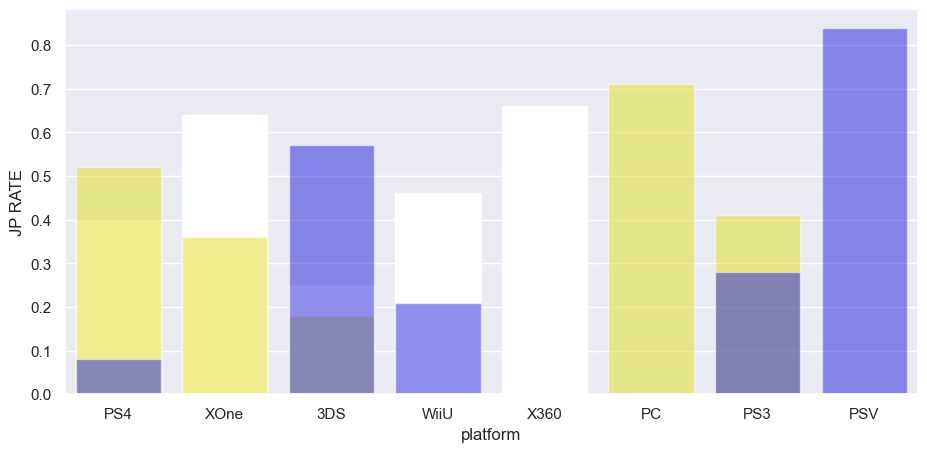

In [41]:
pivot_result = \
bulid_me_region_analyse('na', 'platform').merge(bulid_me_region_analyse('eu', 'platform'), on='platform', how='outer')
pivot_result = pivot_result.merge(bulid_me_region_analyse('jp', 'platform'), on='platform', how='outer')
pivot_result = pivot_result[['rate_x', 'rate_y', 'rate']]
pivot_result.columns = ('NA RATE', 'EU RATE', 'JP RATE')
pivot_result.fillna(0)

sns.barplot(data=pivot_result, x=pivot_result.index, y=pivot_result['NA RATE'], color = 'white', alpha = 1)
sns.barplot(data=pivot_result, x=pivot_result.index, y=pivot_result['EU RATE'], color = 'yellow', alpha = 0.5)
sns.barplot(data=pivot_result, x=pivot_result.index, y=pivot_result['JP RATE'], color = 'blue', alpha = 0.5)
pivot_result.fillna(0)

Этот график подтвердает наши выводы выше

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓  v_2 <a class="tocSkip"> </h2>

Будет хорошо добавить легенду с цветами, чтобы было понятно, где какой регион)

### Влияние ESRB

In [42]:
df_esrb_result_sales = df_2014.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
df_esrb_result_sales['count'] = df.groupby('rating')['na_sales'].count()
display(df_esrb_result_sales.sort_values(by='na_sales', ascending=False))

# В NA влияет больше чем в EU. В JP влияние 

,na_sales,eu_sales,jp_sales,count
rating,,,,
M,47.03,45.54,4.29,1536
undefined,37.44,35.71,32.89,6676
E,26.59,34.83,5.25,3921
T,22.86,20.32,7.70,2905
E10+,17.87,11.54,3.27,1393


Ок, построим график!

<AxesSubplot: xlabel='rating', ylabel='jp_sales'>

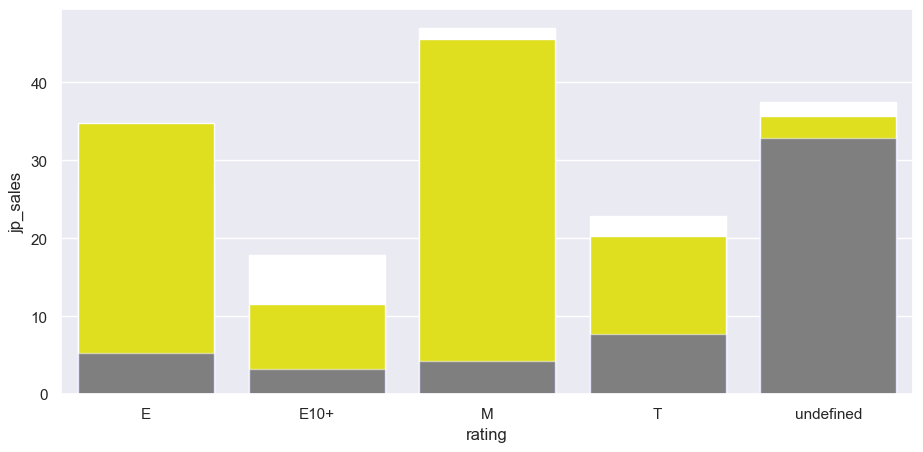

In [43]:
sns.barplot(data=df_esrb_result_sales, x=df_esrb_result_sales.index, y='na_sales', color = 'white', alpha = 1)
sns.barplot(data=df_esrb_result_sales, x=df_esrb_result_sales.index, y='eu_sales', color = 'yellow', alpha = 1)
sns.barplot(data=df_esrb_result_sales, x=df_esrb_result_sales.index, y='jp_sales', color = 'blue', alpha = 0.5)

##### **Вывод по ESRB:**

**Вывод:**
- NA - влияние рейтинга M, E и неизвестного очевидно
- EU - влияние нейтинг M, E и неизвестного очевидно
- JP - Больше всего влияет неизвестный рейтинг. В ёэтом и есть основное отличие.

<div class="alert alert-info">
Сделано! V2
</div

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 v_2 <a class="tocSkip"> </h2>

Супер, сейчас все отлично, но не хватает подписи на графиках) 

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Работа по составлению портретов проведена отличная, но к сожалению, необходимо обновить выводы после актуализации данных. 

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Гипотезы составлены верно)

In [44]:
df[:3]

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,74.09
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,39.47
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,32.23


In [45]:
# нам нужно 2 выборки
df_xbox_rating = df.query('platform == "XOne"')['user_score'].dropna()
print(df_xbox_rating.mean())
df_pc_rating = df.query('platform == "PC"')['user_score'].dropna()
df_pc_rating.mean()
# По-хорошему на этом можно и закончить. Наш компьютер вполне справляется с подсчетом средних)))
# Но мы сделаем t-test тоже))

6.52142857142857


7.065960264900677

In [46]:
alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    list(df_xbox_rating), 
    list(df_pc_rating),
    equal_var = False
                    )

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.5385802963771776e-06
Отвергаем нулевую гипотезу


Действительно, рейтинги разные.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Молодец, что исключил пропуски, а также вывел средние значения)

### Средние пользовательские рейтинги жанров Action и Sports разные.

- H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- H1: Средние пользовательские рейтинги жанров Action и Sports разные

<div class="alert alert-info">
Сделано!
</div

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 v_2 <a class="tocSkip"> </h2>

Теперь все отлично)

In [47]:
# нам нужно 2 выборки
df_action_rating = df.query('genre == "Action"')['user_score'].dropna()
print(df_action_rating.mean())
df_sports_rating = df.query('genre == "Sports"')['user_score'].dropna()
df_sports_rating.mean()
# По-хорошему на этом можно и закончить. Наш компьютер вполне справляется с подсчетом средних)))
# Но мы сделаем t-test тоже))

7.058129175946543


6.951433857539316

In [48]:
alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    list(df_action_rating), 
    list(df_sports_rating),
    equal_var = False
                    )

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.07370217419278534
Не получилось отвергнуть нулевую гипотезу


Действительно, рейтинги практически одинаковые, поэтому гипотеза H0 не подтверждается

<div class="alert alert-info">
Сделано!
</div

# Общий вывод:

Мы провели подготовку данных, исследовательский и статистический анализ, а также проверили 2 гипотезы

Мы провели большую работу по подготовке данных: исключили дубликаты, привели типы данных, поработали с пропусками

Во время исследовательского анализа мы заметили, что платформы появляются и исчезают примерно каждые 2 года.


Для детального анализа мы взяли отчет за последние 2 года, чтобы показать вам что будет востребовано в 2017 году

В данный момент данный рынок находится в небольшом падении. Но несмотря на это остаются потенциально перспективные платформы,
на которые стоит обратить внимание в 2017 году: это PS4, XOne и 3DS

Причем PS4 пользуется спросом и у NA и у EU пользователей. Xone больше для EU, а вот в JP популярна 3DS.

Самые стабильные жанры - Shooter, Sport, Action, Role-Playing
Однако Shooter, Action, Sport больше популярны в NA и EU, а вот в JP популярны Action и Role-Playing.

Стоит обратить на все эти показатели в 2017 году.

<div style="border:solid Purple 2px; padding: 40px">

<h2> Общий комментарий ревьюера 😊 v_3<a class="tocSkip"> </h2>
    <br/>
Павел, спасибо за проект! Успехов в дальнейшем обучении!)
    

<div style="border:solid Purple 2px; padding: 40px">

<h2> Общий комментарий ревьюера 😊 v_2 <a class="tocSkip"> </h2>
    <br/>
Павел, ты отлично поработал, но осталось скорректировать все пункты в соответствии с выбранным актуальным периодом и обновить выводы)

<div style="border:solid Purple 2px; padding: 40px">

<h2> Общий комментарий ревьюера 😊<a class="tocSkip"> </h2>
    <br/>
Павел, ты проделал фантастическую работу, основные задачи проекта выполнены. Особенно хочу выделить аккуратность работы, отличные навыки работы с циклами и визуализацией. Корреляционный анализ выполнен замечательно, молодец!) Однако, есть несколько важных моментов, которые стоит улучшить, чтобы проект стал действительно идеальным!

Необходимо доработать:
    
* Переопределить временные границы.
* Обработка пропусков.
* Стоит добавить анализ игр без рейтинга, для этого обрати еще раз внимание на стратегию обработки пропусков в этой колонке.
* Актуализировать результаты и выводы.
* Подобнее рассмотреть распределение игр по жанрам
* Остальные комментарии ты найдешь в работе

**Желаю удачи и жду твой проект на повторное ревью! Если у тебя вдруг есть какие–либо вопросы, то я с радостью отвечу на них 😊**
    
![gif](https://i.gifer.com/378.gif)
    
Также оставлю дополнительный материал по визуализации, если будет интересно:
    

* книга Александра Богачева [Графики, которые убеждают всех](https://book24.ru/product/grafiki-kotorye-ubezhdayut-vsekh-5873820/)
* [cheatsheet по визуализации](https://extremepresentation.typepad.com/.a/6a00d8341bfd2e53ef0111683a7591970c-pi)
* бесплатный курс от Яндекс.Практикум [Визуальныe презентации](https://practicum.yandex.ru/visual-presentation/)
* Формат таблиц в pandas с помощью style. В том числе цветовое выделение. (https://habr.com/ru/post/521894/)
* Основные компоненты matplotlib (https://pyprog.pro/mpl/mpl_main_components.html)
* 50 оттенков matplotlib — The Master Plots (с полным кодом на Python) (https://habr.com/ru/post/468295/)
* Построение графиков с использованием двух осей. (https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)
* Сайт, подробно представлюящий практически все типы визуализаций. (https://datavizproject.com/)
* Шпаргалка по визуализации данных в Python с помощью Plotly (https://habr.com/ru/post/502958/)
</div> 